In [1]:
# prompt: accede a ficheros de drive directamente

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


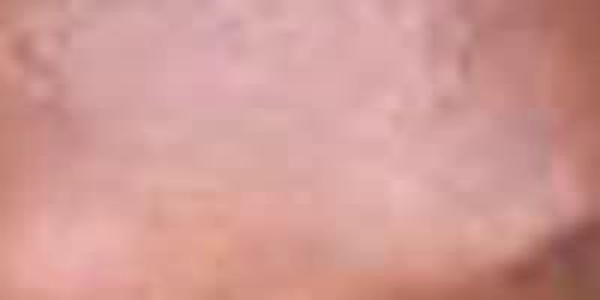

(300, 600, 3)


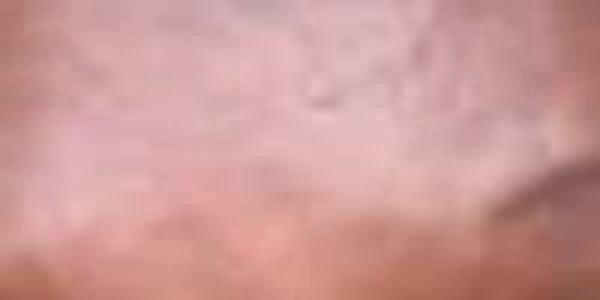

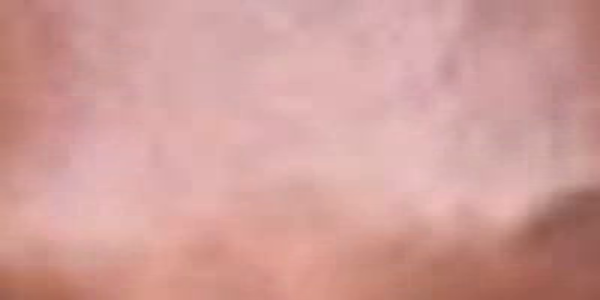

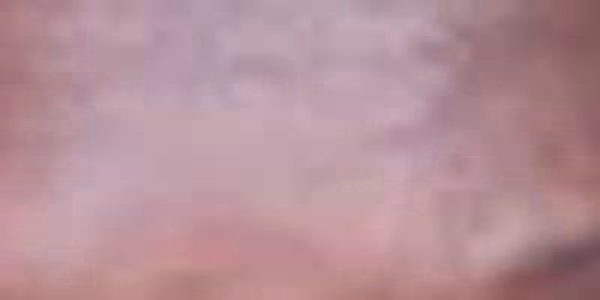

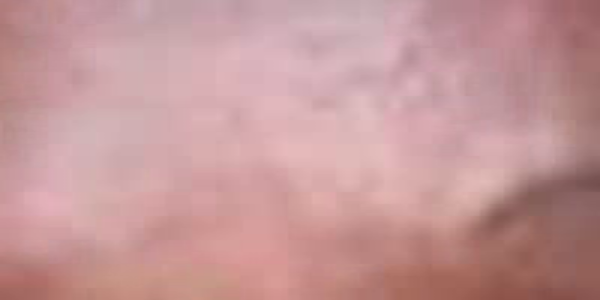

In [ ]:
# prompt: acceder y reproducir video localizado en MyDrive TFG rppg_biases Data Sierra_Leone video10_forehead.avi.
# pero mostrando solo los primeros 100 frames

import cv2
from google.colab.patches import cv2_imshow

video_path = '/content/drive/MyDrive/TFG/rppg_biases/Data/Sierra_Leone/video10_forehead.avi'
cap = cv2.VideoCapture(video_path)

frame_count = 0
while cap.isOpened() and frame_count < 5:
  ret, frame = cap.read()
  if ret:
    frame = cv2.resize(frame, (600, 300))
    cv2_imshow(frame)
    frame_count += 1
    if frame_count == 1:
        print(frame.shape)
  else:
    break

cap.release()
cv2.destroyAllWindows()


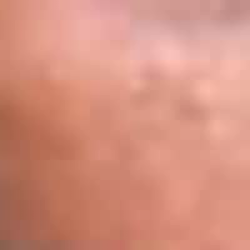

(250, 250, 3)


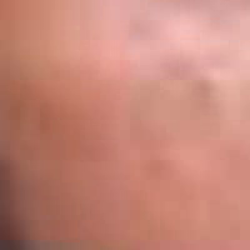

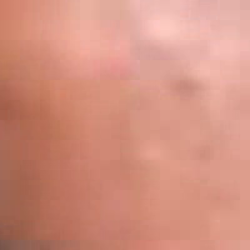

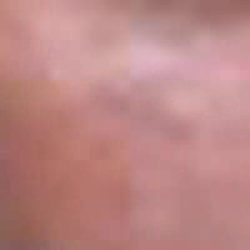

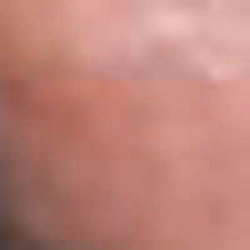

In [ ]:
video_path = '/content/drive/MyDrive/TFG/rppg_biases/Data/Sierra_Leone/video10_leftcheek.avi'
cap = cv2.VideoCapture(video_path)

frame_count = 0
while cap.isOpened() and frame_count < 5:
  ret, frame = cap.read()
  if ret:
    frame = cv2.resize(frame, (250, 250))
    cv2_imshow(frame)
    frame_count += 1
    if frame_count == 1:
        print(frame.shape)
  else:
    break

cap.release()
cv2.destroyAllWindows()

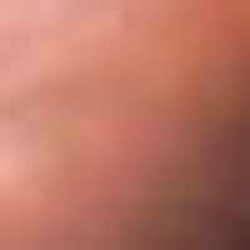

(250, 250, 3)


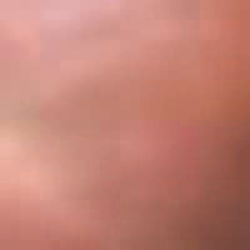

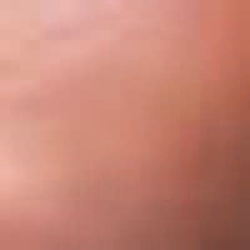

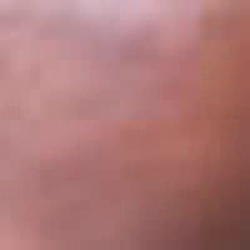

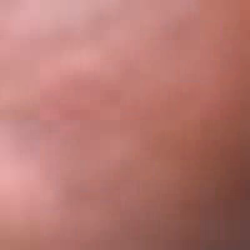

In [ ]:
video_path = '/content/drive/MyDrive/TFG/rppg_biases/Data/Sierra_Leone/video10_rightcheek.avi'
cap = cv2.VideoCapture(video_path)

frame_count = 0
while cap.isOpened() and frame_count < 5:
  ret, frame = cap.read()
  if ret:
    frame = cv2.resize(frame, (250, 250))
    cv2_imshow(frame)
    frame_count += 1
    if frame_count == 1:
        print(frame.shape)
  else:
    break

cap.release()
cv2.destroyAllWindows()

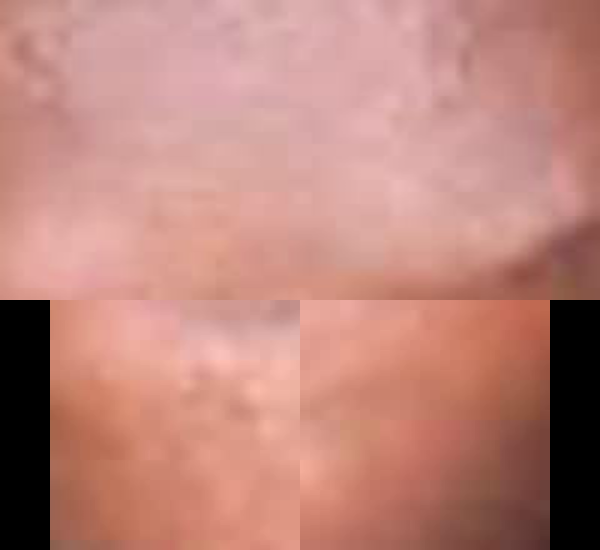

(550, 600, 3)


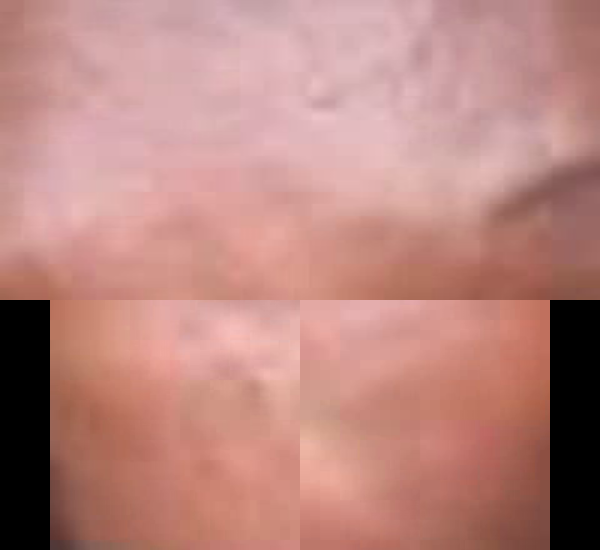

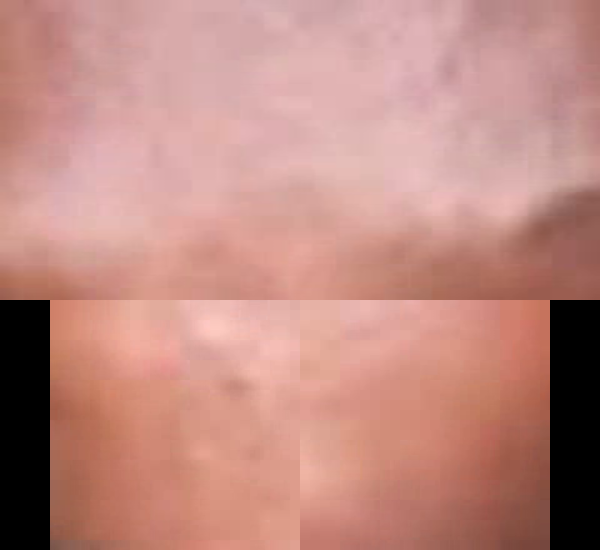

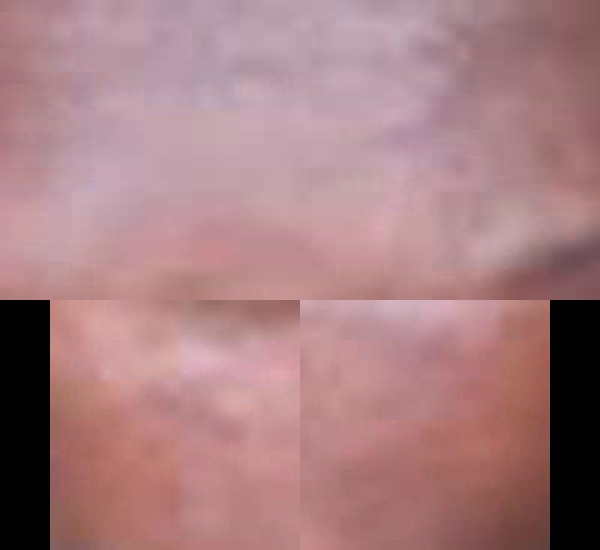

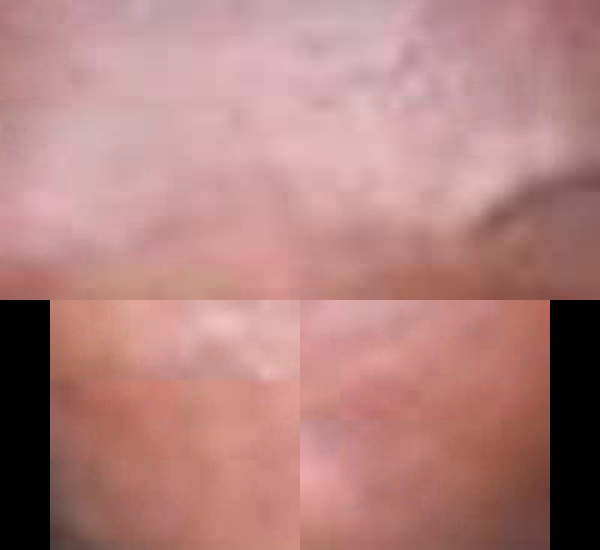

In [ ]:
video_paths = [
    '/content/drive/MyDrive/TFG/rppg_biases/Data/Sierra_Leone/video10_forehead.avi',
    '/content/drive/MyDrive/TFG/rppg_biases/Data/Sierra_Leone/video10_leftcheek.avi',
    '/content/drive/MyDrive/TFG/rppg_biases/Data/Sierra_Leone/video10_rightcheek.avi'
]

caps = [cv2.VideoCapture(path) for path in video_paths]

frame_count = 0
while all(cap.isOpened() for cap in caps) and frame_count < 5:
    ret, frames = zip(*[cap.read() for cap in caps])
    if all(r for r in ret):
        # Redimensionar los fotogramas según las especificaciones
        forehead_frame = cv2.resize(frames[0], (600, 300))
        left_cheek_frame = cv2.resize(frames[1], (250, 250))
        right_cheek_frame = cv2.resize(frames[2], (250, 250))

        # Concatenar las imágenes de las mejillas horizontalmente
        bottom_frame = np.concatenate((left_cheek_frame, right_cheek_frame), axis=1)

        # Agregar borde negro al bottom_frame (izquierda y derecha)
        bottom_frame = cv2.copyMakeBorder(bottom_frame, 0, 0, 50, 50, cv2.BORDER_CONSTANT, value=[0, 0, 0])

        # Concatenar el fotograma de la frente con el fotograma combinado de las mejillas
        final_frame = np.concatenate((forehead_frame, bottom_frame), axis=0)

        cv2_imshow(final_frame)
        frame_count += 1

        if frame_count == 1:
            print(final_frame.shape)
    else:
        break

# Liberar los recursos
for cap in caps:
    cap.release()

cv2.destroyAllWindows()

In [ ]:
import cv2
import os
import numpy as np

# Directorio que contiene los videos
input_dir = '/content/drive/MyDrive/TFG/rppg_biases/Data/Sierra_Leone'
output_dir = '/content/drive/MyDrive/TFG/rppg_biases/Data/Processed_Videos_Sierra_Leone'

# Crear el directorio de salida si no existe
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Obtener una lista de los nombres de archivos de video
video_files = sorted([f for f in os.listdir(input_dir) if f.endswith('.avi')])

# Agrupar videos por prefijo común (videoX)
video_groups = {}
for file in video_files:
    prefix = "_".join(file.split('_')[:-1])  # Obtener el prefijo común (e.g., "video1")
    if prefix not in video_groups:
        video_groups[prefix] = []
    video_groups[prefix].append(file)

# Procesar cada grupo de videos
for prefix, files in video_groups.items():
    if len(files) == 3:  # Asegurarse de que hay exactamente 3 videos por grupo
        video_paths = [os.path.join(input_dir, f) for f in files]

        caps = [cv2.VideoCapture(path) for path in video_paths]

        # Suponemos que todos los videos tienen el mismo FPS
        fps = caps[0].get(cv2.CAP_PROP_FPS)

        # Calcular el número máximo de fotogramas para 1 minuto
        max_frames = int(fps * 60)

        frame_count = 0
        output_frames = []

        while all(cap.isOpened() for cap in caps) and frame_count < max_frames:
            ret, frames = zip(*[cap.read() for cap in caps])
            if all(r for r in ret):
                # Redimensionar los fotogramas según las especificaciones
                forehead_frame = cv2.resize(frames[0], (60, 30))
                left_cheek_frame = cv2.resize(frames[1], (25, 25))
                right_cheek_frame = cv2.resize(frames[2], (25, 25))

                # Concatenar las imágenes de las mejillas horizontalmente
                bottom_frame = np.concatenate((left_cheek_frame, right_cheek_frame), axis=1)

                # Agregar borde negro al bottom_frame (izquierda y derecha)
                bottom_frame = cv2.copyMakeBorder(bottom_frame, 0, 0, 5, 5, cv2.BORDER_CONSTANT, value=[0, 0, 0])

                # Concatenar el fotograma de la frente con el fotograma combinado de las mejillas
                final_frame = np.concatenate((forehead_frame, bottom_frame), axis=0)

                # Agregar el fotograma final a la lista de frames a guardar
                output_frames.append(final_frame)

                frame_count += 1

            else:
                break

        # Crear el nombre de archivo de salida basado en el prefijo del grupo
        output_filename = f"combined_{prefix}.avi"
        output_path = os.path.join(output_dir, output_filename)

        # Guardar el video resultante
        if output_frames:
            height, width, _ = output_frames[0].shape
            out = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'XVID'), fps, (width, height))

            for frame in output_frames:
                out.write(frame)

            out.release()

        # Liberar los recursos
        for cap in caps:
            cap.release()

        print(f"Processed and saved: {output_filename} (Duration: 1 minute)")

cv2.destroyAllWindows()

Processed and saved: combined_video10.avi (Duration: 1 minute)
Processed and saved: combined_video11.avi (Duration: 1 minute)
Processed and saved: combined_video12.avi (Duration: 1 minute)
Processed and saved: combined_video13.avi (Duration: 1 minute)
Processed and saved: combined_video14.avi (Duration: 1 minute)
Processed and saved: combined_video15.avi (Duration: 1 minute)
Processed and saved: combined_video16.avi (Duration: 1 minute)
Processed and saved: combined_video17.avi (Duration: 1 minute)
Processed and saved: combined_video18.avi (Duration: 1 minute)
Processed and saved: combined_video19.avi (Duration: 1 minute)
Processed and saved: combined_video1.avi (Duration: 1 minute)
Processed and saved: combined_video20.avi (Duration: 1 minute)
Processed and saved: combined_video21.avi (Duration: 1 minute)
Processed and saved: combined_video22.avi (Duration: 1 minute)
Processed and saved: combined_video23.avi (Duration: 1 minute)
Processed and saved: combined_video24.avi (Duration: 1 m

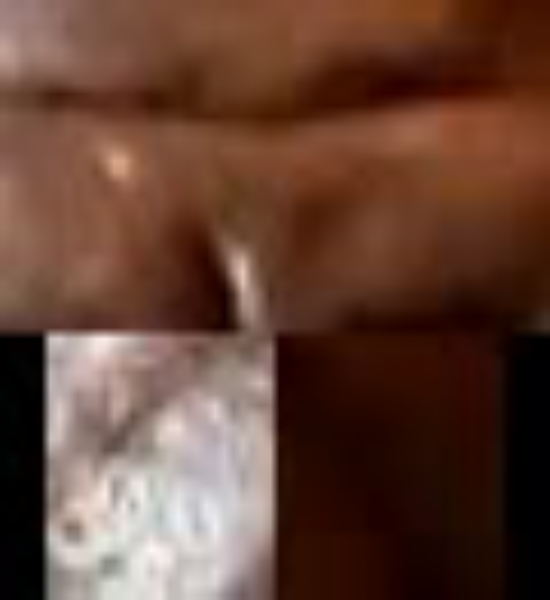

(600, 550, 3)


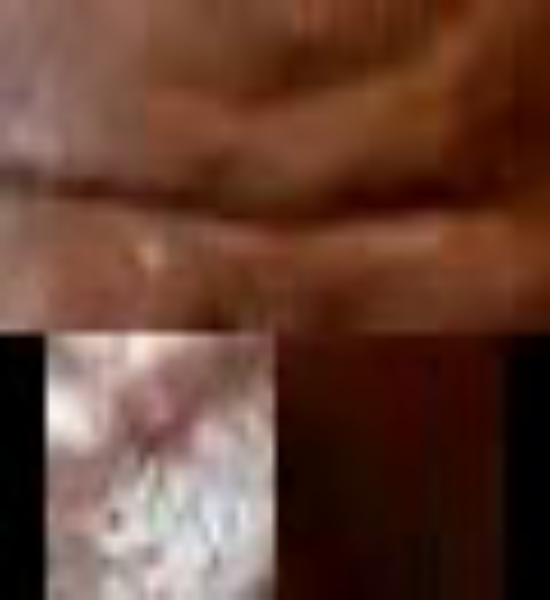

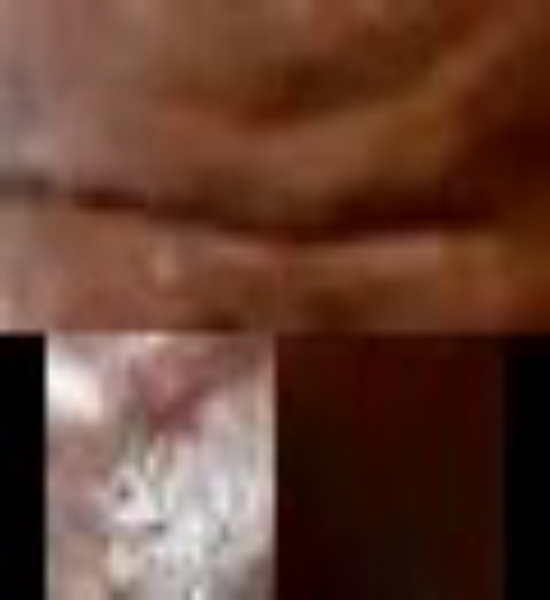

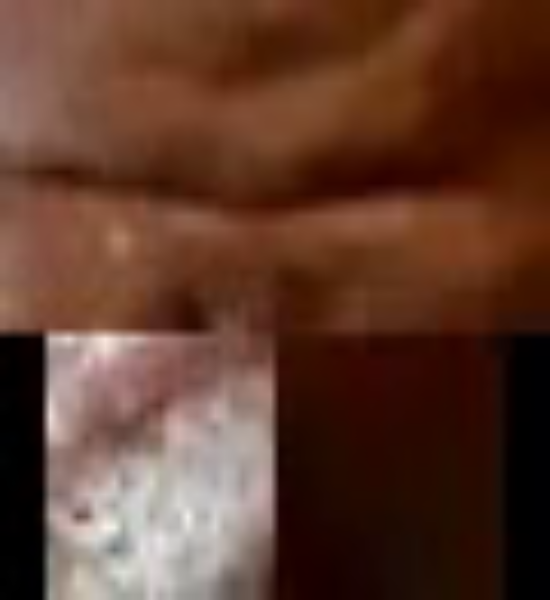

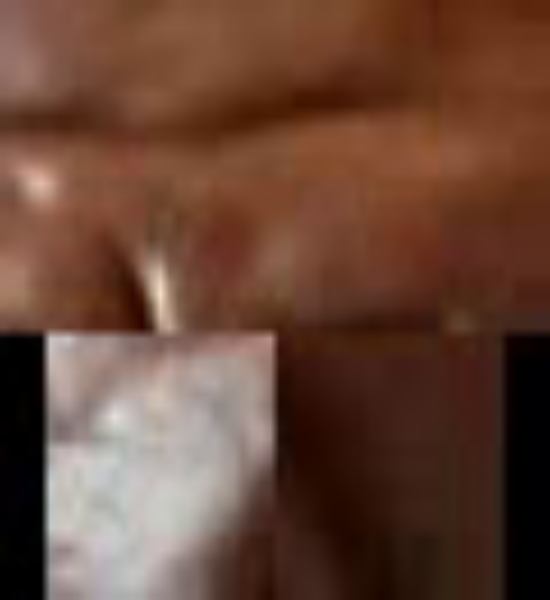

In [ ]:
video_path = '/content/drive/MyDrive/TFG/rppg_biases/Data/Processed_Videos_Sierra_Leone/combined_video1.avi'
cap = cv2.VideoCapture(video_path)

frame_count = 0
while cap.isOpened() and frame_count < 5:
  ret, frame = cap.read()
  if ret:
    frame = cv2.resize(frame, (550, 600))
    cv2_imshow(frame)
    frame_count += 1
    if frame_count == 1:
        print(frame.shape)
  else:
    break

cap.release()
cv2.destroyAllWindows()

In [2]:
# Importamos las librerías necesarias
import numpy as np
import pandas as pd
import os
import cv2
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, TimeDistributed, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras import Input

# Tamaño del ROI: 55x60 (según lo especificado)
IMG_SIZE = (55, 60)

# Duración: primeros 10 segundos (suponiendo 30 fps)
SEQUENCE_LENGTH = 300  # 30 fps * 10 segundos

# Función para leer los videos desde una carpeta y convertirlos en secuencias de fotogramas
def load_videos_from_csv_and_folder(csv_path, video_folder, img_size, sequence_length):
    # Cargamos las frecuencias desde el CSV
    df = pd.read_csv(csv_path)

    # Creamos arrays para almacenar los videos y sus frecuencias correspondientes
    video_data = []
    heart_rates = []

    for idx, row in df.iterrows():
        video_name = 'combined_' + row.iloc[0] + '.avi'  # Asumimos que los videos terminan en .avi
        video_path = os.path.join(video_folder, video_name)
        heart_rate = row.iloc[1]

        # Leemos el video
        if os.path.exists(video_path):
            video = cv2.VideoCapture(video_path)
            frames = []
            success, frame = video.read()
            count = 0  # Contador para limitar los primeros 10 segundos
            while success and len(frames) < sequence_length:
                frame = cv2.resize(frame, img_size)  # Redimensionamos el frame al tamaño del ROI (55x60)
                frames.append(frame)
                success, frame = video.read()
                count += 1
            video.release()

            # Solo guardamos el video si tiene la longitud adecuada (300 fotogramas en este caso)
            if len(frames) == sequence_length:
                video_data.append(np.array(frames))
                heart_rates.append(heart_rate)  # Guardamos la frecuencia cardíaca correspondiente

    return np.array(video_data), np.array(heart_rates)

# Cargamos los videos y las frecuencias cardíacas desde el archivo CSV y la carpeta de videos
csv_path = '/content/drive/MyDrive/TFG/rppg_biases/Ground_Truth/Sierra_Leone_GT.csv'  # Ruta al archivo CSV
video_folder = '/content/drive/MyDrive/TFG/rppg_biases/Data/Processed_Videos_Sierra_Leone/'  # Ruta a la carpeta con los videos

# Cargar los videos y las frecuencias cardíacas
X_videos, y_heart_rates = load_videos_from_csv_and_folder(csv_path, video_folder, IMG_SIZE, SEQUENCE_LENGTH)

# Aseguramos que las frecuencias y los videos coincidan en cantidad
assert len(X_videos) == len(y_heart_rates), "El número de videos no coincide con el número de frecuencias cardíacas."



In [3]:
# Dividimos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_videos, y_heart_rates, test_size=0.2, random_state=42)

# Definimos el modelo MobileNet + GRU
def build_model(sequence_length, img_size):
    mobilenet = MobileNet(input_shape=(img_size[0], img_size[1], 3),
                          include_top=False,
                          weights='imagenet')

    model = Sequential()
    model.add(Input(shape=(sequence_length, img_size[0], img_size[1], 3)))
    model.add(TimeDistributed(mobilenet))
    model.add(TimeDistributed(GlobalAveragePooling2D()))
    model.add(GRU(64, return_sequences=False))
    model.add(Dense(1, activation='linear'))

    model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['mae'])

    return model



In [ ]:
# Creamos el modelo
model = build_model(SEQUENCE_LENGTH, IMG_SIZE)

# Entrenamos el modelo
history = model.fit(X_train, y_train, epochs=20, batch_size=4, validation_data=(X_test, y_test))

# Evaluamos el modelo
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f'MAE en el conjunto de prueba: {test_mae}')

# Guardamos el modelo
model.save('rPPG_mobilenet_gru_model.h5')


<ipython-input-3-51d73fcf115d>:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet = MobileNet(input_shape=(img_size[0], img_size[1], 3),


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/20
